# Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Loading the dataset

In [3]:
url = "https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/4_ThreeNum.csv"
data = pd.read_csv(url)
data.head()

,country,continent,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,43.828,31889923,974.580338
1,Albania,Europe,76.423,3600523,5937.029526
2,Algeria,Africa,72.301,33333216,6223.367465
3,Angola,Africa,42.731,12420476,4797.231267
4,Argentina,Americas,75.320,40301927,12779.379640


# Preliminary Visualization
It is a good idea to visualize the distribution of the variables by themselves before trying to visualize them individually.

Columns in dataset:
column_name: country     datatype: object
column_name: continent   datatype: object
column_name: lifeExp     datatype: float64
column_name: pop         datatype: int64
column_name: gdpPercap   datatype: float64

No. of unique categories in country: 142
No. of unique categories in continent: 5


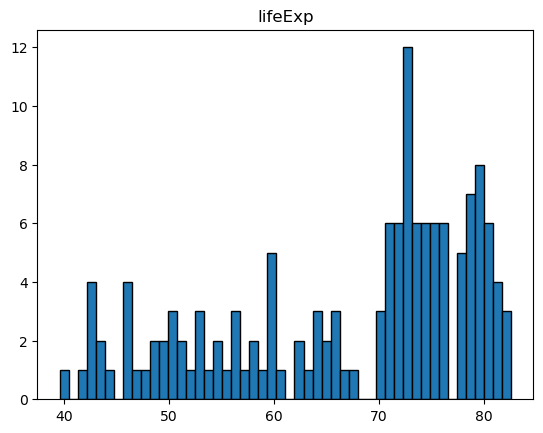

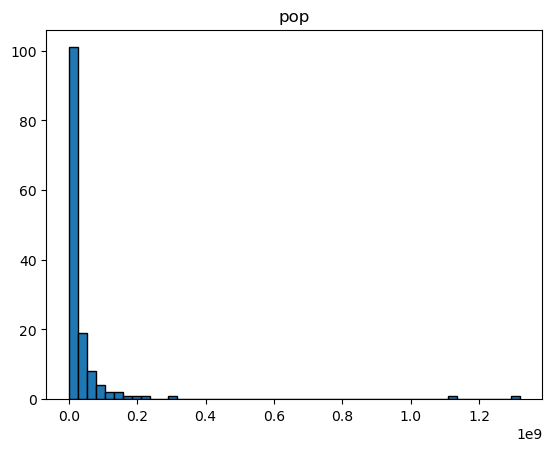

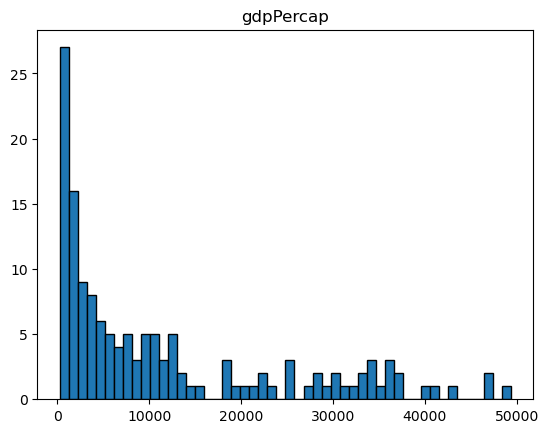

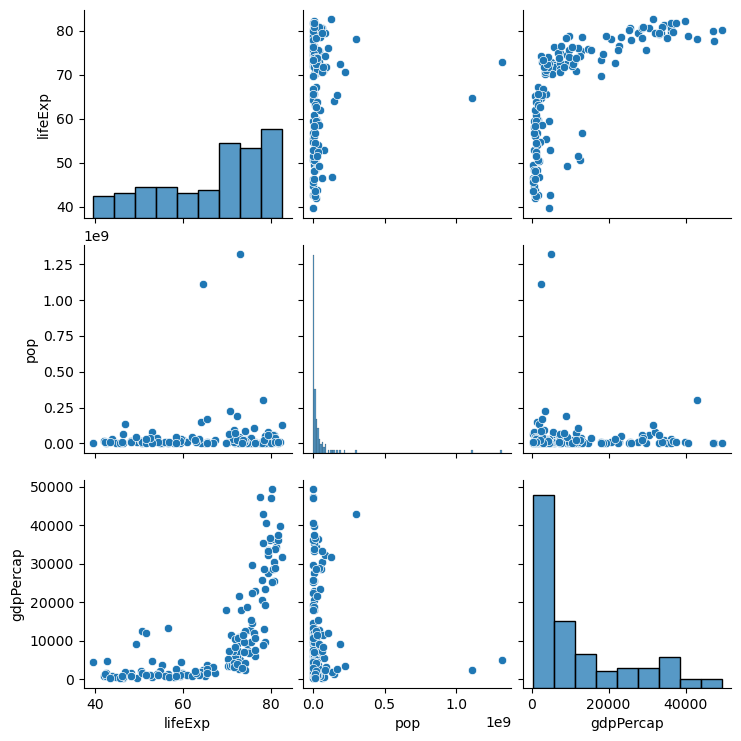

In [9]:
print(f'Columns in dataset:')
for col in data.columns:
    print(f'column_name: {col: <10}', f' datatype: {data[col].dtype}')
print()
for col in ['country', 'continent']:
    print(f'No. of unique categories in {col}: {len(np.unique(data[col]))}')

for col in data.columns:
    if col in ['country', 'continent']:
        continue
    plt.hist(data[col], bins=50, edgecolor='black')
    plt.title(f'{col}')
    plt.show()

sns.pairplot(data)
plt.show()

# Bubble plot
Bubble plots are similar to scatterplots as they allows the comparison of two variables along the x and y axis. However, they also allow the comparison of a third variable represented by the bubble size. The relation between the third variable and the others is harder to visualize than that between the first and second variable. Hence, try to keep the most important relation along the first and second axes.

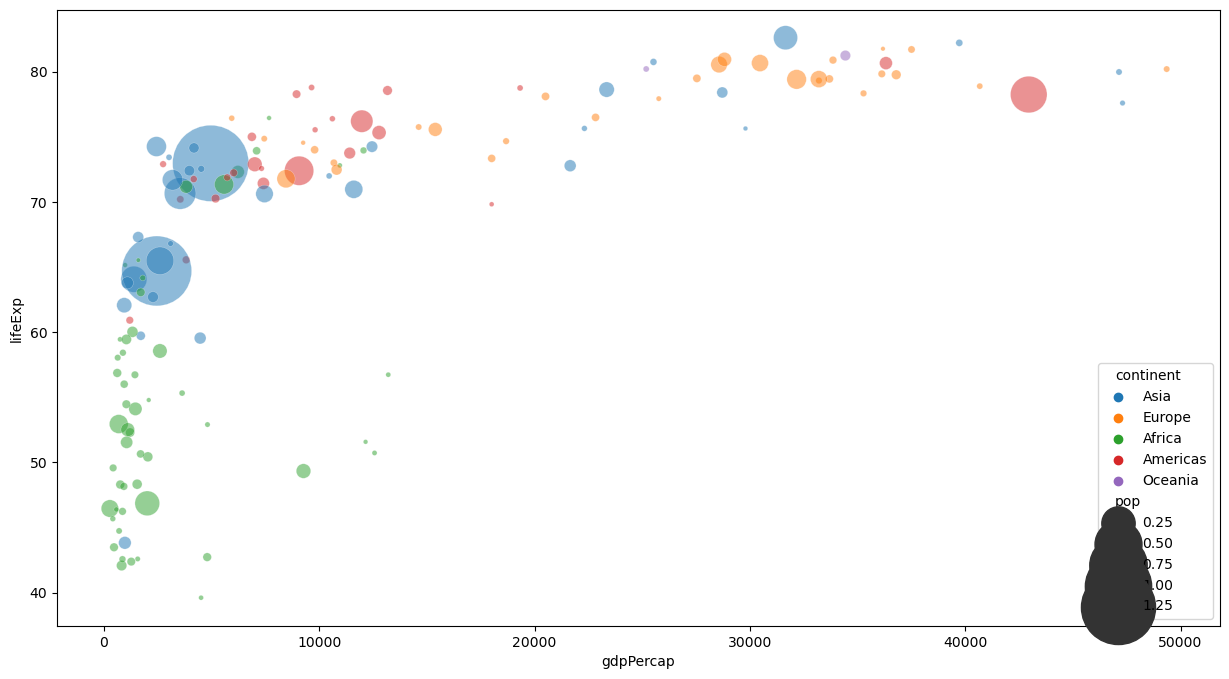

In [57]:
plt.figure(figsize=[15, 8])
sns.scatterplot(data=data, x='gdpPercap', y='lifeExp', size='pop', hue='continent', sizes=(10, 3000), alpha=0.5)
plt.show()

In the second bubble plot below, we can see that there is no correlation between `pop` and `gdPercap`. So this bubble plot is not ideal.

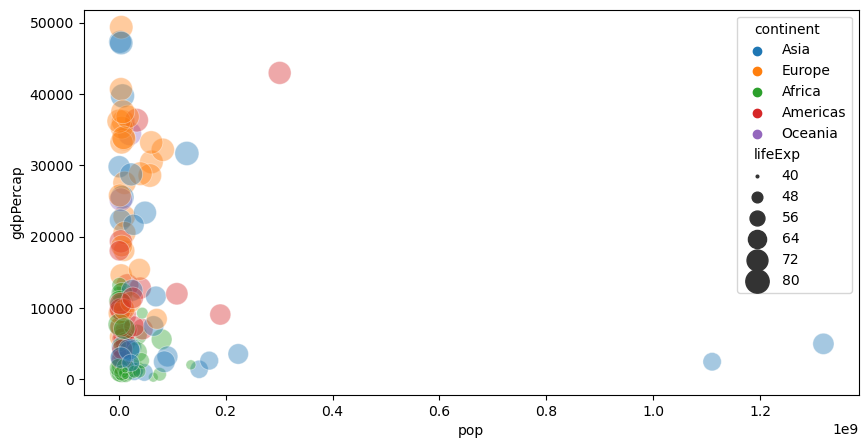

In [73]:
plt.figure(figsize=[10, 5])
sns.scatterplot(data=data, x='pop', y='gdpPercap', size='lifeExp', hue='continent', sizes=(1, 300), alpha=0.4)
plt.show()

In the third bubble plot below, we can see that there is no correlation between `pop` and `lifeExp`. So this bubble plot is not ideal either.

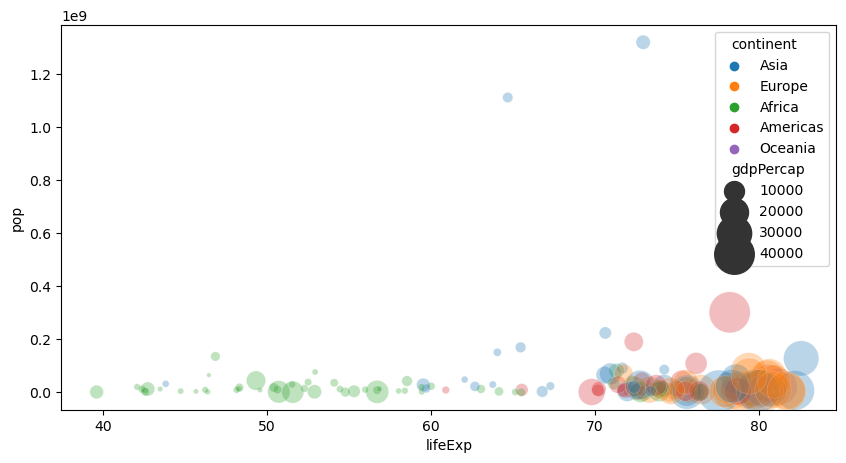

In [72]:
plt.figure(figsize=[10, 5])
sns.scatterplot(data=data, x='lifeExp', y='pop', size='gdpPercap', hue='continent', sizes=(10, 1000), alpha=0.3)
plt.show()

# Heatmap 2d
A grid system where there are two columns for coordinates and third column is for a numeric variable is visualized using 2d heatmaps.

In [98]:
from matplotlib.pyplot import cm
data = pd.read_csv('https://userpages.umbc.edu/~gobbert/teaching/teaching1997to2004/math426.s2002/volcanoz.dat', sep='   ', header=None).T
print(data.shape)

C:\Users\ishaa\AppData\Local\Temp\ipykernel_28500\960473803.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('https://userpages.umbc.edu/~gobbert/teaching/teaching1997to2004/math426.s2002/volcanoz.dat', sep='   ', header=None).T


(87, 61)


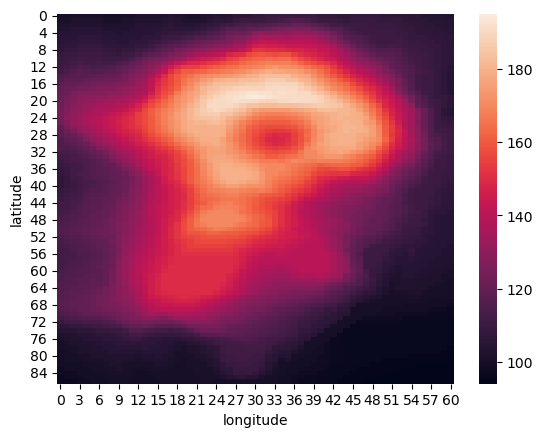

In [103]:
sns.heatmap(data.values)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

# 3d surface plot

(61, 87) (61, 87) (61, 87)


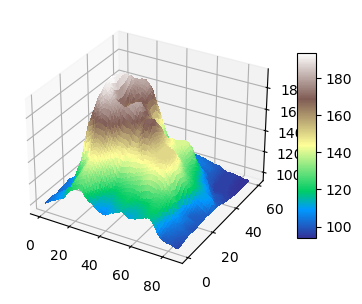

In [128]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
data_temp = data.T
X = data_temp.columns.to_numpy()
Y = data_temp.index.to_numpy()
X, Y = np.meshgrid(X, Y)
Z = data_temp.values
print(X.shape, Y.shape, Z.shape)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.terrain,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()